#                                                     Capstone Final Project


# Project: Exploring Toronto for Opening a New Chain of Gourmet Pizza Place with Bar

# 1. Introduction: 


## 1.1 Description of the Problem, Background

    For the Capstone project, a hypothetical scenario is being created for an Italian restauranteur who wants to open a chain of a gourmet pizza place with a bar in Toronto in multiple locations. Pizza is probably the most popular food among Canadians. There is already plethora of pizza places that offer bar facility as well. The idea behind this project is that there may not be enough pizza places in Toronto that offer the facility of a bar as well. Therefore, a pizza place with a bar might present a great opportunity for this restauranteur who is, now, living in Canada. Since there are pizza places everywhere and bars are also located all across Toronto area, this entrepreneur is thinking of opening this restaurant in locations or neighborhoods where there are less or no pizza places and bars. With the purpose in mind, finding the location to open such a chain restaurant is one of the most important decisions for this entrepreneur. 
    The objective of this capstone project is to find the most suitable locations for the entrepreneur to open this chain of gourmet pizza place with a bar in Toronto, Canada. By using data science methodology and machine learning (e.g. clustering), this project aims to provide solutions to answer the business question: What are the best possible locations to open a chain of pizza places with the facility of a bar.




## 1.2 Target Audience

    The entrepreneurs who want to find the most suitable location to open a pizza place with a bar.

# 2. Data

## 2.1 Required Data

    In order to answer the questions for the project, the following data is required:
    •	A List of neighborhoods in Toronto to categorize Toronto into smaller areas.
    •	Geographical locations (Latitudes and Longitudes) of these neighborhoods to know the venues in the neighbourhoods.
    •	The distribution of population by different ethnicities to identify the neighborhoods which are densely populated with Italians as it might be helpful in  identifying the suitable neighborhood to open a gourmet pizza place with a bar because Italians, specifically, might be more interested in a gourmet pizza than other ethnicities.
    •	Data of the venues (pizza places and bars) in Toronto which will help me determine the places with the least number of pizza places and bars by using data science methodology.

        


## 2.2 Data Sources

 The following data sources were used for this project.
 
    - "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)" Wiki page to get the information about the neighborhoods in Toronto

    - "https://cocl.us/Geospatial_data" csv file to get the geographical coordinates (longitudes and latitudes) of the neighborhoods.

    - "Demographics of Toronto" (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) . A wiki page to get information about the distribution of population by their ethnicity Using this page I’m going to identify the neighborhoods which are densely populated with Italians.

    - Foursquare’s API ((https://developer.foursquare.com/docs)to get location and other information about various venues in Toronto Foursquare API

In [3]:
import requests 
import pandas as pd
import numpy as np
!conda install -c conda-forge wikipedia --yes
import wikipedia as wp
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
import json
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
import matplotlib.colors as colors
print('libraries imported')
print('wikipedia, geopy and folium, yellowbrick installed')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    wikipedia:       1.4.0-py_2        conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0                  --> 2019.11.28-hecc5488_0 conda-forge
    certifi:         2019.11.28-py36_0     

## 2.3 Data Acquisition and Cleaning

### 2.3.1 Reading/Scraping Toronto Neighborhoods Table from Wikipedia Link
    “List of Postal code of Canada: M” wikipedia page was scraped in order to obtain the data about the Neighborhoods in Toronto.
    The Dataframe will comprise three columns: PostalCode, Borough, and Neighborhood
        - Only the cells where Borough is "not assigned" are ignored.
        - The neighborhoods with the same postal code will be combined into one row. For example inn the the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.
        - If a cell has a borough but its neighbourhood is "not assigned", the neighborhood will be the same as the borough.

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
df = pd.read_html(r.content,attrs = {'class': 'wikitable'})[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [5]:
# Remove the rows where Boroughs are not assigned
df= df[df.Borough != 'Not assigned']
df.head(20)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Not assigned
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [6]:
# If a Neighbourhood is not assigned, set it equal to Borough
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
df.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [7]:
# Grouping the data set by Boroughs
df = df.groupby(['Borough', 'Postcode'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df

,Borough,Postcode,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
5,Central Toronto,M4V,"Deer Park, Forest Hill SE, Rathnelly, South Hi..."
6,Central Toronto,M5N,Roselawn
7,Central Toronto,M5P,"Forest Hill North, Forest Hill West"
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville"
9,Downtown Toronto,M4W,Rosedale


### 2.3.2 Adding geographical coordinates to the data set
    Next step is to add the geographical coordinates to these neighborhoods. The data present in Geospatial Data csv file will be used combined with the existing neighborhood dataframe by merging them both based on the postal code.

In [8]:
dfPC = pd.read_csv('http://cocl.us/Geospatial_data')
dfPC.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
dfPC.rename(columns={'Postal Code':'Postcode'}, inplace=True)
dfPC.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
dfFinal = pd.merge(df, dfPC, on='Postcode')
dfFinal.head()

,Borough,Postcode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [11]:
print('The data set has {} boroughs and {} neighborhoods.'.format(
        len(dfFinal['Borough'].unique()),
        dfFinal.shape[0]
    )
)
print('The names of Boroughs are ') 
print (dfFinal['Borough'].unique())

The data set has 11 boroughs and 103 neighborhoods.
The names of Boroughs are 
['Central Toronto' 'Downtown Toronto' 'East Toronto' 'East York'
 'Etobicoke' 'Mississauga' 'North York' "Queen's Park" 'Scarborough'
 'West Toronto' 'York']


### 2.3.3 Scrap the distribution of population from Wikipedia
    Another factor that can help us in deciding which locations will be most suitable options to open a gourmet pizza place with a bar is the distribution of population based on the ethnic diversity for each neighborhood. It might be helpful in  identifying the suitable neighborhood to open a gourmet pizza place with a bar because Italians, specifically, might be more interested in a gourmet pizza than other ethnicities.  

    The Wikipedia page, “Demographics of Toronto” was scraped in order to obtain the data about the Toronto neighborhood and most populated neighbourhoods with Italian ethnicities were identified.

In [12]:
html = wp.page("Demographics of Toronto").html().encode("UTF-8")
#TORONTO & EAST YORK population by ethnicity 
TEY_population_df = pd.read_html(html, header = 0)[13]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#NORTH YORK population by ethnicity 
North_population_df = pd.read_html(html, header = 0)[14]
North_population_df = North_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
North_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [36]:
#SCARBOROUGH population distribution by ethnicity 
Scar_population_df = pd.read_html(html, header = 0)[15]
Scar_population_df = Scar_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
Scar_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#ETOBICOKE & YORK population by ethnicity 
ETY_population_df = pd.read_html(html, header = 0)[16]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
ETY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.4 Getting the location data by using Foursquare

    Foursquare API is very useful online tool and used my many softwares and applications like Uber etc. In this project, it is used to retrieve informtion about the venues present in the neighborhoods of Toronto. The API returns a JSON file and which is turned into a data-frame. Within a radius of 1 Km, 100 popular spots will be retrieved for each neighborhood.

In [38]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [39]:
CLIENT_ID = 'ZBKNTWPUP2QTS5QPF4WUJGSH0WVMQO1RVIXX2TZZPZALJ4R5' # your Foursquare ID
CLIENT_SECRET = 'IRQFT12Q2HK4F1SRL5D0SDGWV2FELRQI0NUYXNLVYZUSBW1J' # your Foursquare Secret
VERSION = '20200124' # Foursquare API version
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()
#Define the function to get the category
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Japango,Sushi Restaurant,43.655268,-79.385165
2,Rolltation,Japanese Restaurant,43.654918,-79.387424
3,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501
4,Nathan Phillips Square,Plaza,43.652270,-79.383516


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
LIMIT = 100
toronto_venues = getNearbyVenues(names=dfFinal['Neighborhood'],
                                   latitudes=dfFinal['Latitude'],
                                   longitudes=dfFinal['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Queen's Park
The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Business Reply Mail Processing Centre 969 Eastern
Woodbine Gardens, Parkview Hill
Woodbine Heights
Leaside
Thorncl

In [18]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Lake,43.727910,-79.386857,Lake
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
5,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
6,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
7,Davisville North,43.712751,-79.390197,Winners,43.713236,-79.393873,Department Store
8,Davisville North,43.712751,-79.390197,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel
9,Davisville North,43.712751,-79.390197,Subway,43.708474,-79.390674,Sandwich Place


In [19]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",10,10,10,10,10,10
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Downsview North, Wilson Heights",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,55,55,55,55,55,55


In [20]:
print('There are {} uniques categories of venues in Toronto.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories of venues in Toronto.


    There are 266 unique categories and include pizza place and bars. One hot encoding for getting dummies of each venue category will be done  to calculate mean of all venues grouped by there neighborhoods.

In [22]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.020000,0.00,0.000000,0.000000,0.000000,0.010000,0.0,0.01
1,Agincourt,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
4,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.047619,0.000000,0.000000,0.000000,0.0,0.00
6,Bayview Village,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
7,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
8,Berczy Park,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.018182,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00
9,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00


In [23]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop                      193
Café                              99
Restaurant                        64
Pizza Place                       50
Park                              50
Italian Restaurant                48
Bakery                            48
Bar                               44
Sandwich Place                    40
Hotel                             38
Japanese Restaurant               37
Gym                               32
Fast Food Restaurant              30
Clothing Store                    29
Breakfast Spot                    27
Grocery Store                     26
American Restaurant               26
Burger Joint                      26
Seafood Restaurant                25
Sushi Restaurant                  25
Gastropub                         24
Steakhouse                        24
Pub                               23
Chinese Restaurant                23
Thai Restaurant                   23
Ice Cream Shop                    22
Beer Bar                          20
P

# 3. Exploratory Data Analysis

## 3.1 Relationship between Neighborhood and Pizza Place

    This analysis will focus on determining how populated are neighborhoods with pizza places and if there are any neighbourhoods that stand out.

In [24]:
toronto_pizza = toronto_grouped[['Neighborhood', 'Pizza Place']]
toronto_pizza

,Neighborhood,Pizza Place
0,"Adelaide, King, Richmond",0.020000
1,Agincourt,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.100000
4,"Alderwood, Long Branch",0.222222
5,"Bathurst Manor, Downsview North, Wilson Heights",0.047619
6,Bayview Village,0.000000
7,"Bedford Park, Lawrence Manor East",0.040000
8,Berczy Park,0.000000
9,"Birch Cliff, Cliffside West",0.000000


In [26]:
toronto_merged = pd.merge(dfFinal, toronto_pizza, on='Neighborhood')
toronto_merged

,Borough,Postcode,Neighborhood,Latitude,Longitude,Pizza Place
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.000000
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.000000
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.057143
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000
5,Central Toronto,M4V,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,0.071429
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.000000
7,Central Toronto,M5P,"Forest Hill North, Forest Hill West",43.696948,-79.411307,0.000000
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.047619
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.000000


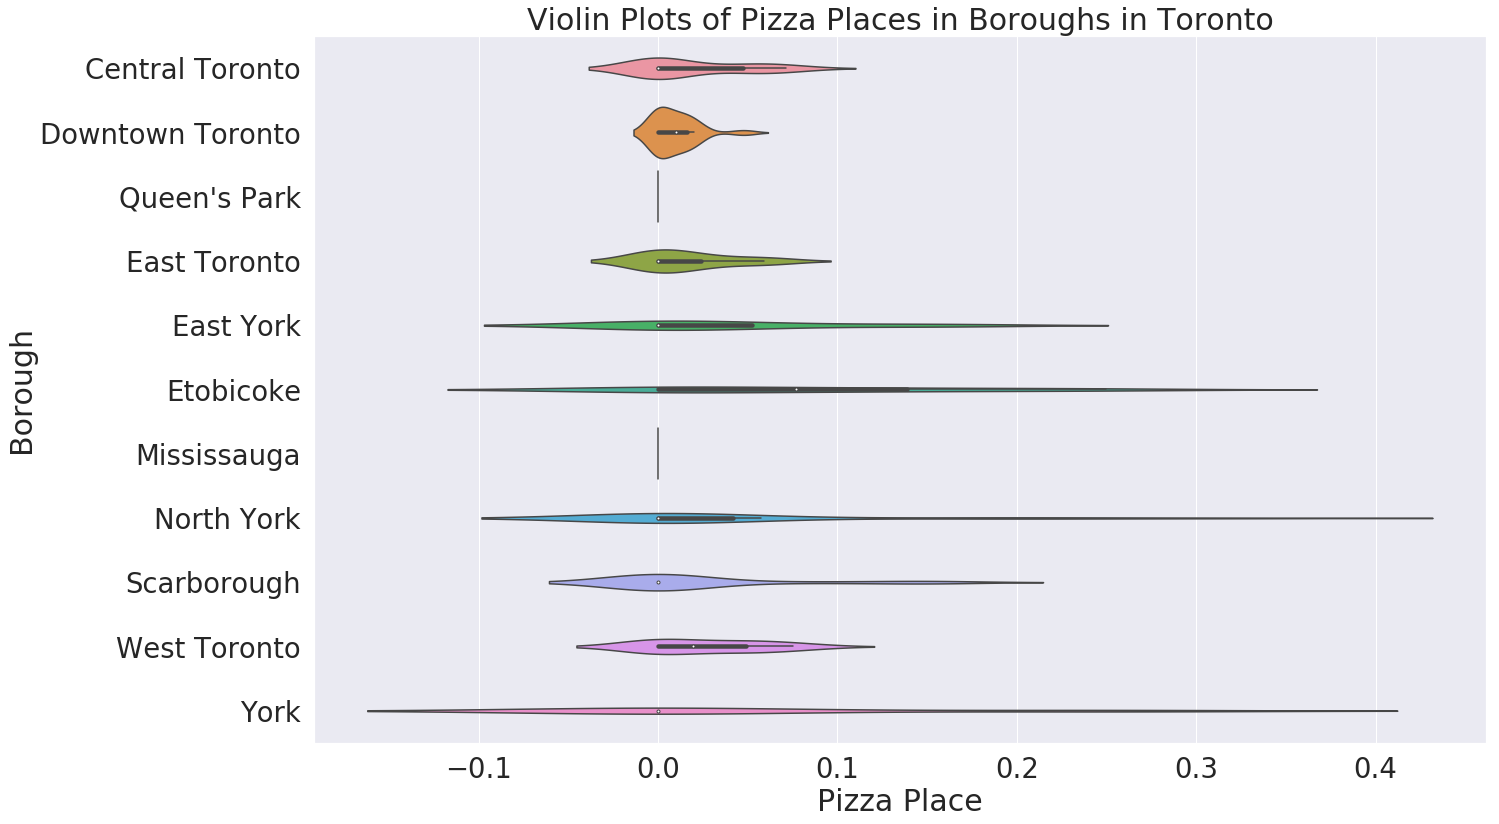

In [27]:
# Let's try Categorical plot 

fig = plt.figure(figsize=(21,13))

sns.set(font_scale=2.5)
sns.violinplot(x="Pizza Place", y="Borough", data=toronto_merged);
#ax = sns.boxplot(x="Pizza Place", y="Borough", data=toronto_merged)

plt.title('Violin Plots of Pizza Places in Boroughs in Toronto', fontsize=30)
plt.show()

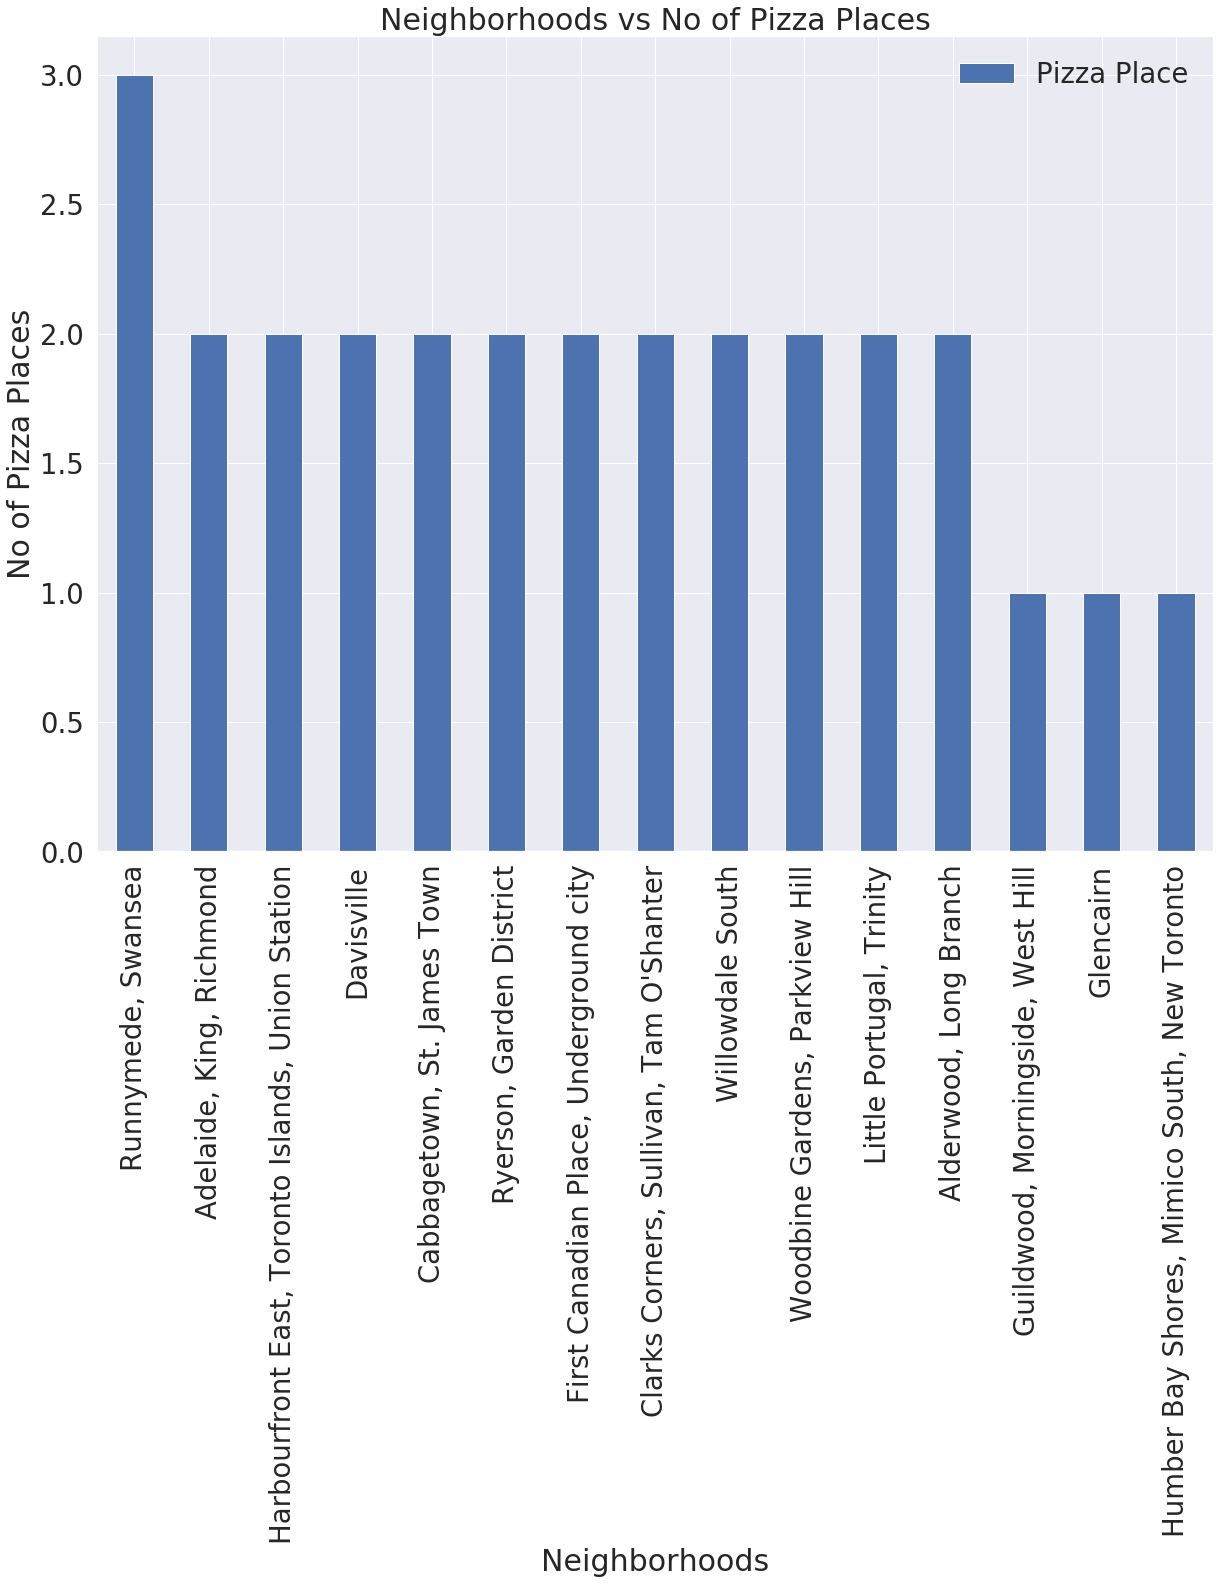

In [28]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Pizza Place'].sum())
graph = graph.sort_values(by ='Pizza Place', ascending=False)
graph.iloc[:15].plot(kind='bar', figsize=(20,15))
plt.xlabel("Neighborhoods", fontsize=30)
plt.ylabel("No of Pizza Places", fontsize=30)
plt.title("Neighborhoods vs No of Pizza Places", fontsize=30)
plt.show()

## 3.2 Relationship between Neighborhoods and Number of Bars

    This analysis will focus on determining how populated are neighborhoods with bars and if there are any neighbourhoods that stand out.

In [30]:
toronto_bar = toronto_grouped[['Neighborhood', 'Bar']]
toronto_bar

,Neighborhood,Bar
0,"Adelaide, King, Richmond",0.040000
1,Agincourt,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000
4,"Alderwood, Long Branch",0.000000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000
6,Bayview Village,0.000000
7,"Bedford Park, Lawrence Manor East",0.000000
8,Berczy Park,0.000000
9,"Birch Cliff, Cliffside West",0.000000


In [31]:
toronto_merged1 = pd.merge(dfFinal, toronto_bar, on='Neighborhood')
toronto_merged1

,Borough,Postcode,Neighborhood,Latitude,Longitude,Bar
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.000000
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.000000
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.000000
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000
5,Central Toronto,M4V,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,0.000000
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.000000
7,Central Toronto,M5P,"Forest Hill North, Forest Hill West",43.696948,-79.411307,0.000000
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.000000
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.000000


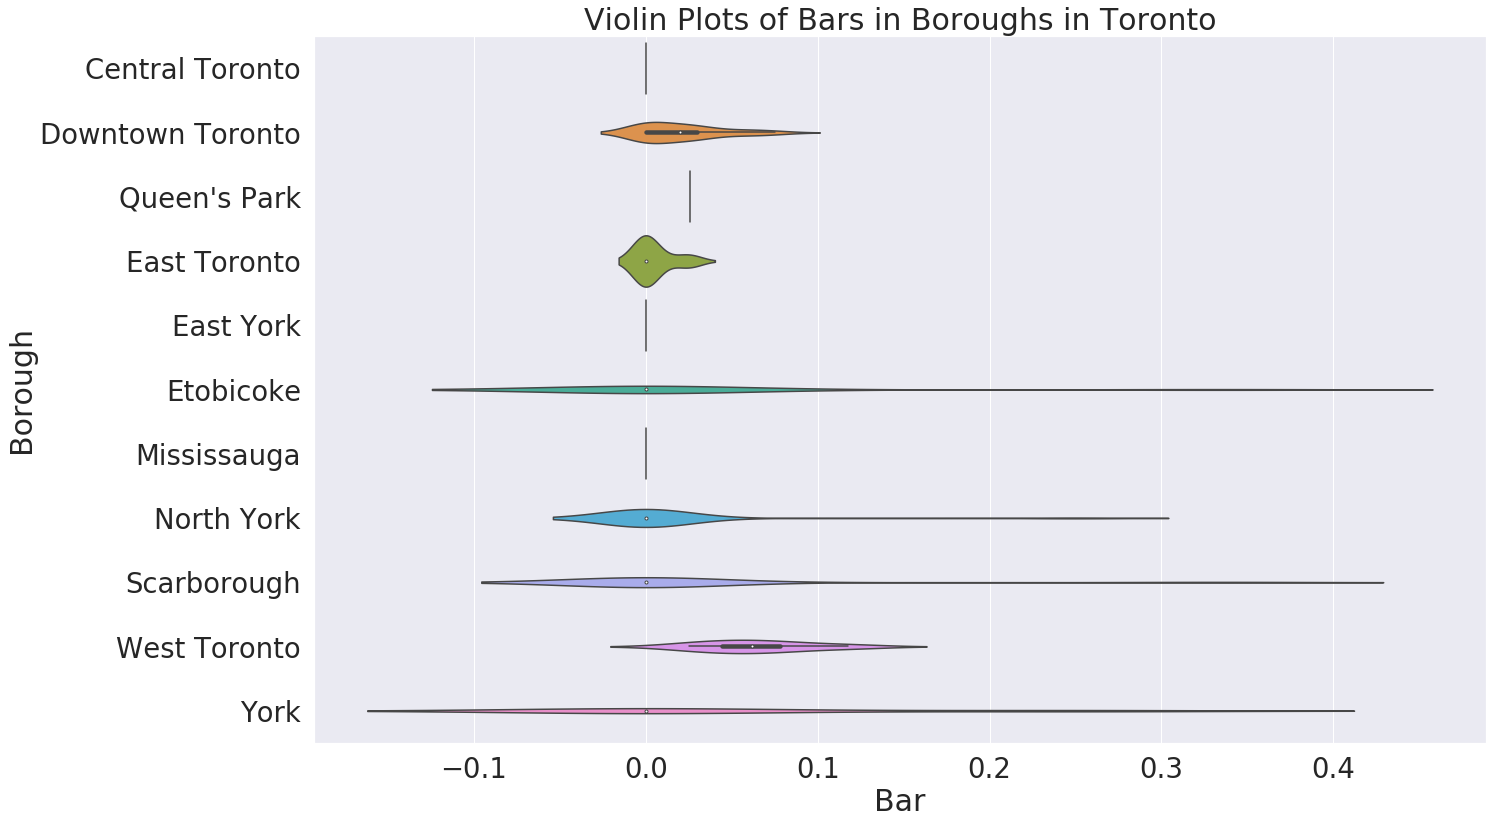

In [77]:
# Let's try Categorical plot 

fig = plt.figure(figsize=(21,13))

sns.set(font_scale=2.5)
sns.violinplot(x="Bar", y="Borough", data=toronto_merged1);

plt.title('Violin Plots of Bars in Boroughs in Toronto', fontsize=30)
plt.show()

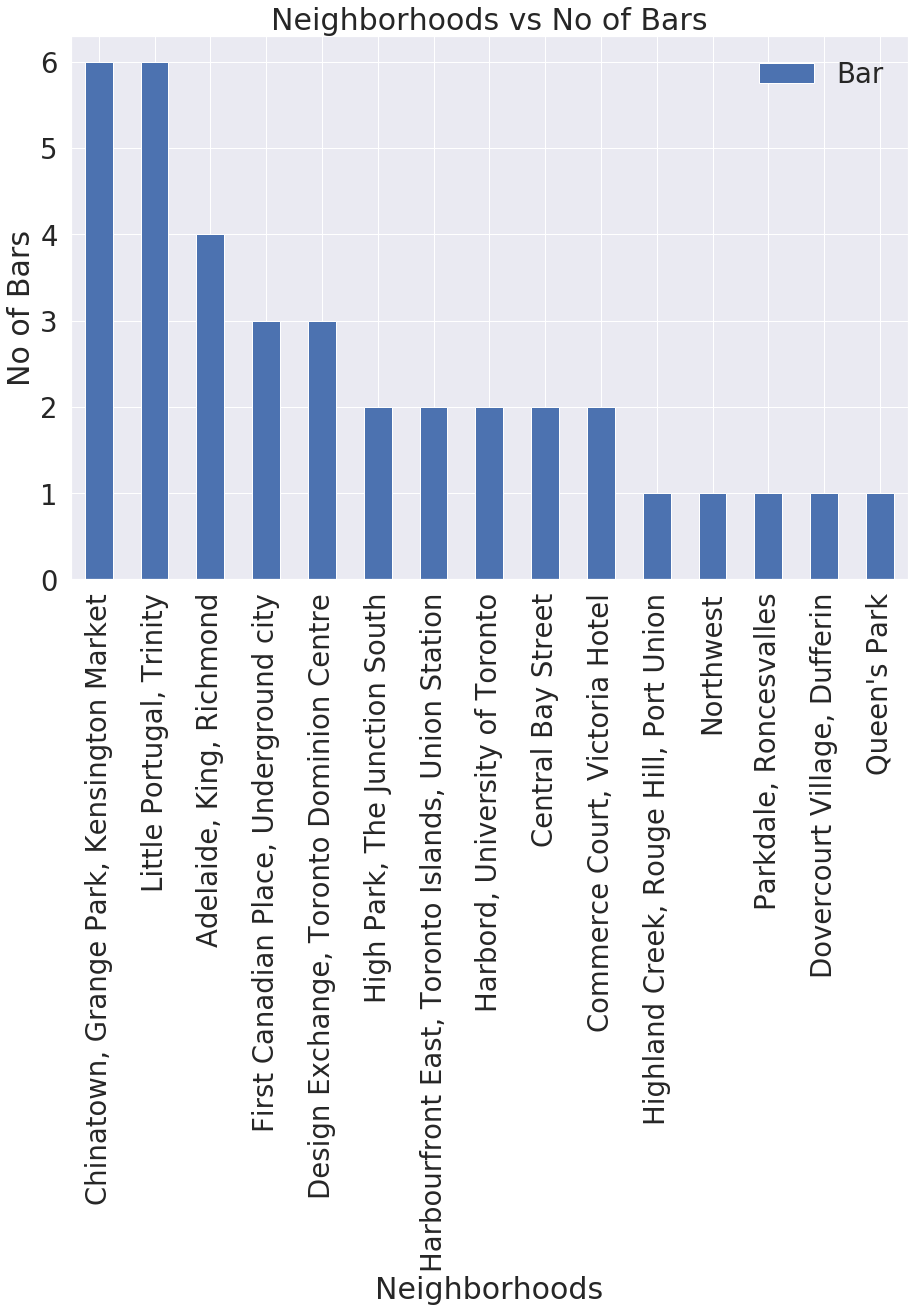

In [32]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Bar'].sum())
graph = graph.sort_values(by ='Bar', ascending=False)
graph.iloc[:15].plot(kind='bar', figsize=(15,10))
plt.xlabel("Neighborhoods", fontsize=30)
plt.ylabel("No of Bars", fontsize=30)
plt.title("Neighborhoods vs No of Bars", fontsize=30)
plt.show()

## 3.3 Relationship between neighborhood and Italian popultion

    This analysis will focus on determining how populated are neighborhoods with Italian people and if there are any neighbourhoods that stand out. This will help us determine if any relationship exists between number of pizza places and Italian population in a neighborhood.

In [40]:
#Merge all the population tables by neighbourhood with the ethnic percentage
ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                               'Ethnic Origin #9','Ethnic Origin 9 in %',
                              ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can pick the neighborhoods with highest Italian population percentage by using the method given below.


In [41]:
#Filtering the riding with Itlian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Italian')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Italian')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'Italian')]
pop_italian_df = pd.DataFrame(temp).reset_index()
pop_italian_df.drop('index',axis=1,inplace=True)

pop_italian_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4,NaN,NaN
1,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1,NaN,NaN
4,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN,NaN,NaN
5,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.9,Russian,7.7,Italian,7.3,French,7.2
8,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.7,French,7.7,Italian,7.4,NaN,NaN


In [45]:
#retaining only Italian ethnic percentage & the neighborhood name 
columns_list = pop_italian_df.columns.to_list()
pop_italian_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_italian_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_italian_df.at[i, j] == 'Italian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_italian_DF_with_percent = pop_italian_DF_with_percent.append({'Riding':pop_italian_df.at[i, 'Riding'], 'Population':pop_italian_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_italian_df.at[i, j], 'Percentage': pop_italian_df.at[i, percent_col]},ignore_index=True)

pop_italian_DF_with_percent

Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,Italian,9.5,112925.0,Eglinton-Lawrence
1,Italian,12.8,107725.0,Humber River-Black Creek
2,Italian,13.4,103760.0,York Centre
3,Italian,9.1,127520.0,Etobicoke-Lakeshore
4,Italian,15.1,116055.0,Etobicoke Centre
5,Italian,12.8,115130.0,York South-Weston
6,Italian,11.1,107395.0,Davenport
7,Italian,7.3,104940.0,Toronto-St. Paul's
8,Italian,7.4,100520.0,University-Rosedale


In [46]:
pop_italian_DF_with_percent['Italian Population'] = (pop_italian_DF_with_percent['Percentage'] * pop_italian_DF_with_percent['Population'])/100
pop_italian_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_italian_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_italian_DF_with_percent

,Riding,Italian Population
0,Eglinton-Lawrence,10727.875
1,Humber River-Black Creek,13788.800
2,York Centre,13903.840
3,Etobicoke-Lakeshore,11604.320
4,Etobicoke Centre,17524.305
5,York South-Weston,14736.640
6,Davenport,11920.845
7,Toronto-St. Paul's,7660.620
8,University-Rosedale,7438.480


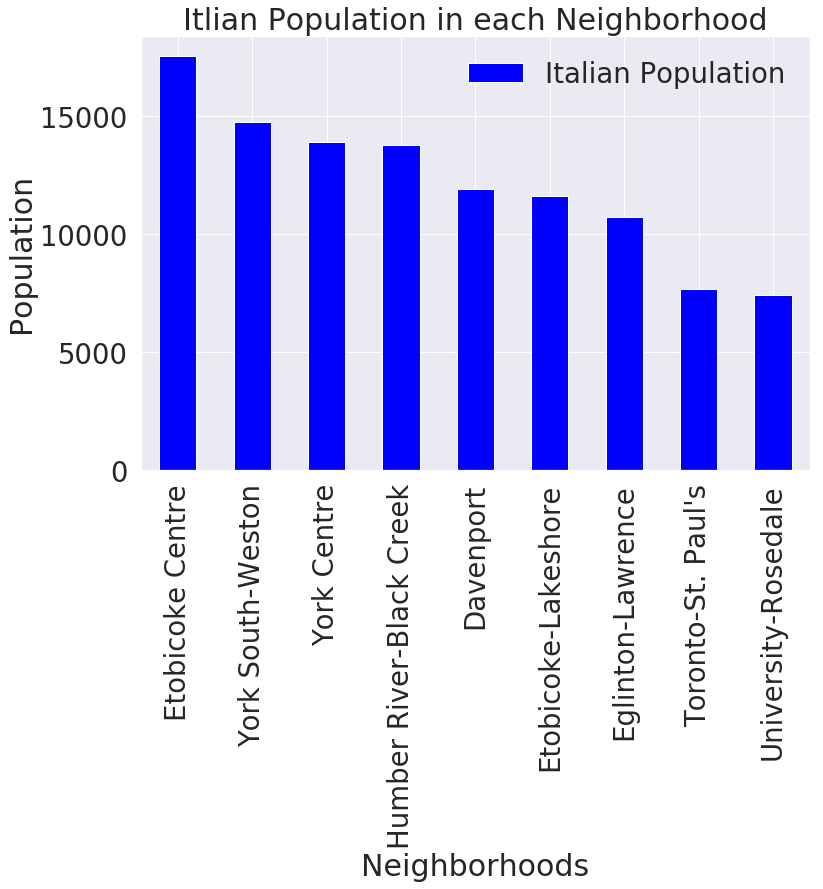

The names of Boroughs are 
['Central Toronto' 'Downtown Toronto' 'East Toronto' 'East York'
 'Etobicoke' 'Mississauga' 'North York' "Queen's Park" 'Scarborough'
 'West Toronto' 'York']


In [47]:
bar_graph = pop_italian_DF_with_percent.sort_values(by='Italian Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Italian Population',figsize=(12,8), color='blue')
plt.title("Itlian Population in each Neighborhood", fontsize=30)
plt.xlabel("Neighborhoods", fontsize =30)
plt.ylabel("Population", fontsize =30)
plt.show()
print('The names of Boroughs are ') 
print (dfFinal['Borough'].unique())

# 4 Modeling
    The main aim of the project is to find mutiple locations which have no or least number of bars and pizza places to open the chain of gourmet pizza and bar. There Clustering will be used to group the neighborhoods which have different number of bars and pizza places.

## 4.1 Clustering Neighbourhoods of Toronto for Pizza Place Locations

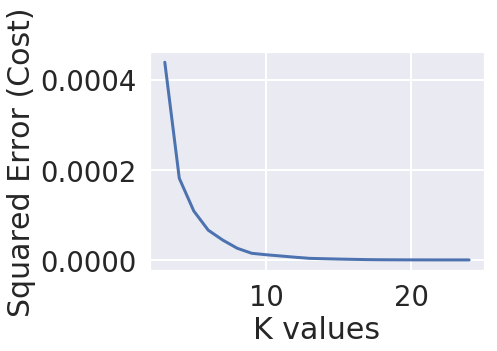

In [49]:
toronto_pizza_clustering = toronto_pizza.drop('Neighborhood', 1)


error_cost = []

for i in range(3,25):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_pizza_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,25), error_cost, color='b', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

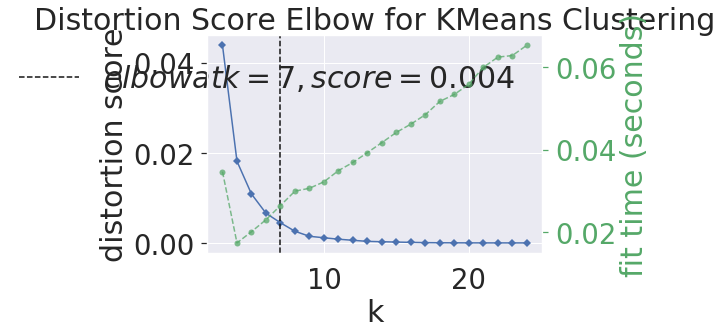

In [50]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,25))

visualizer.fit(toronto_pizza_clustering)        # Fit the data to the visualizer
visualizer.show()      # Finalize and render the figure

The nalysis of the elbow method (by using using distortion score) and Squared error for each K value, K = 7 seems to be the optimal.

In [51]:
kclusters = 7

toronto_pizza_clustering = toronto_pizza.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_pizza_clustering)

kmeans.labels_

array([6, 0, 0, 4, 1, 2, 0, 2, 0, 0, 4, 0, 2, 0, 0, 2, 0, 0, 0, 0, 6, 0,
       6, 0, 3, 0, 0, 6, 2, 0, 4, 0, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 1, 3, 0, 0, 6, 0, 0, 0, 4, 0, 5, 0, 1, 0, 4, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0, 0, 0, 6, 0, 2, 0, 0,
       6, 1, 0, 2, 1, 3, 0, 2, 3, 0, 3, 0, 0], dtype=int32)

In [52]:
toronto_pizza.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = dfFinal
#merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_pizza.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,0.000000
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.0,0.000000
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,2.0,0.057143
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.0,0.000000


In [53]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## 4.2 Examining the Clusters for Pizza Places

In [47]:
#Cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,0.0
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.0,0.0
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.0,0.0
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.0,0.0
7,Central Toronto,M5P,"Forest Hill North, Forest Hill West",43.696948,-79.411307,0.0,0.0
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.0,0.0
12,Downtown Toronto,M5A,Harbourfront,43.654260,-79.360636,0.0,0.0
14,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,0.0,0.0
15,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,0.0,0.0


In [48]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
39,Etobicoke,M8W,"Alderwood, Long Branch",43.602414,-79.543484,1.0,0.222222
46,Etobicoke,M9R,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,1.0,0.250000
67,North York,M4A,Victoria Village,43.725882,-79.315572,1.0,0.200000
70,North York,M6B,Glencairn,43.709577,-79.445073,1.0,0.250000
100,York,M6N,"The Junction North, Runnymede",43.673185,-79.487262,1.0,0.250000


In [49]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,2.0,0.057143
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,2.0,0.047619
10,Downtown Toronto,M4X,"Cabbagetown, St. James Town",43.667967,-79.367675,2.0,0.047619
32,East Toronto,M7Y,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,2.0,0.058824
36,East York,M4H,Thorncliffe Park,43.705369,-79.349372,2.0,0.052632
55,North York,M2N,Willowdale South,43.770120,-79.408493,2.0,0.057143
61,North York,M3H,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,2.0,0.047619
68,North York,M5M,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,2.0,0.040000
91,West Toronto,M6H,"Dovercourt Village, Dufferin",43.669005,-79.442259,2.0,0.052632
92,West Toronto,M6J,"Little Portugal, Trinity",43.647927,-79.419750,2.0,0.039216


In [50]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
33,East York,M4B,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,3.0,0.153846
45,Etobicoke,M9P,Westmount,43.696319,-79.532242,3.0,0.166667
57,North York,M2R,Willowdale West,43.782736,-79.442259,3.0,0.166667
77,Scarborough,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3.0,0.142857
88,Scarborough,M1T,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,3.0,0.153846


In [51]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
5,Central Toronto,M4V,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,4.0,0.071429
38,Etobicoke,M8V,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,4.0,0.076923
44,Etobicoke,M9C,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,4.0,0.111111
47,Etobicoke,M9V,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,4.0,0.100000
90,Scarborough,M1W,L'Amoreaux West,43.799525,-79.318389,4.0,0.083333
96,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,4.0,0.075000


In [52]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
72,North York,M9L,Humber Summit,43.756303,-79.565963,5.0,0.333333


In [53]:
#Cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place
11,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,6.0,0.012346
13,Downtown Toronto,M5B,"Ryerson, Garden District",43.657162,-79.378937,6.0,0.020000
17,Downtown Toronto,M5H,"Adelaide, King, Richmond",43.650571,-79.384568,6.0,0.020000
18,Downtown Toronto,M5J,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,6.0,0.020000
19,Downtown Toronto,M5K,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,6.0,0.010000
20,Downtown Toronto,M5L,"Commerce Court, Victoria Hotel",43.648198,-79.379817,6.0,0.010000
22,Downtown Toronto,M5T,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,6.0,0.012500
24,Downtown Toronto,M5W,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,6.0,0.010526
25,Downtown Toronto,M5X,"First Canadian Place, Underground city",43.648429,-79.382280,6.0,0.020000
29,East Toronto,M4K,"The Danforth West, Riverdale",43.679557,-79.352188,6.0,0.023810


## 4.3 Clustering Neighbourhoods of Toronto for Bars Locations

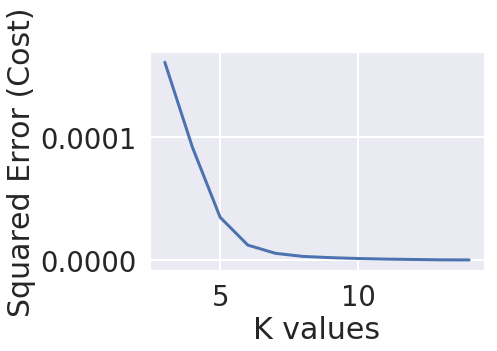

In [55]:
toronto_bar_clustering = toronto_bar.drop('Neighborhood', 1)


error_cost = []

for i in range(3,15):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_bar_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,15), error_cost, color='b', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

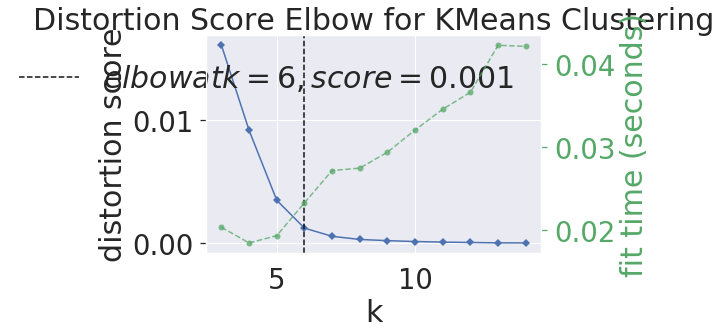

In [56]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))

visualizer.fit(toronto_bar_clustering)        # Fit the data to the visualizer
visualizer.show()      # Finalize and render the figure

In [61]:
kclusters = 6

toronto_bar_clustering = toronto_bar.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_bar_clustering)

kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 5, 2, 2, 2, 2, 0, 5, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 5, 2, 0, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 3, 1, 5, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [62]:
#toronto_bar.insert(0, 'Cluster Labels', kmeans.labels_)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged2 = toronto_merged.join(toronto_bar.set_index('Neighborhood'), on='Neighborhood')
toronto_merged2.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged2.reset_index(drop=True, inplace=True)
toronto_merged2['Cluster Labels'].astype(int)
toronto_merged2.head()

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,0.000000,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,0.000000,0.0
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.0,0.000000,0.0
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,2.0,0.057143,0.0
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.0,0.000000,0.0


In [63]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged2['Latitude'], toronto_merged2['Longitude'], toronto_merged2['Neighborhood'], toronto_merged2['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## 4.2 Examining the Clusters for Bars

In [73]:
#Cluster 0
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 0]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,0.0,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,0.0,0.000000
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.0,0.0,0.000000
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.0,0.0,0.000000
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.0,0.0,0.000000
7,Central Toronto,M5P,"Forest Hill North, Forest Hill West",43.696948,-79.411307,0.0,0.0,0.000000
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.0,0.0,0.000000
12,Downtown Toronto,M5A,Harbourfront,43.654260,-79.360636,0.0,0.0,0.000000
14,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,0.0,0.0,0.000000
15,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,0.0,0.0,0.000000


In [74]:
#Cluster 1
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 1]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
39,Etobicoke,M8W,"Alderwood, Long Branch",43.602414,-79.543484,1.0,0.222222,0.0
46,Etobicoke,M9R,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,1.0,0.250000,0.0
67,North York,M4A,Victoria Village,43.725882,-79.315572,1.0,0.200000,0.0
70,North York,M6B,Glencairn,43.709577,-79.445073,1.0,0.250000,0.0
100,York,M6N,"The Junction North, Runnymede",43.673185,-79.487262,1.0,0.250000,0.0


In [75]:
#Cluster 2
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 2]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,2.0,0.057143,0.000000
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,2.0,0.047619,0.000000
10,Downtown Toronto,M4X,"Cabbagetown, St. James Town",43.667967,-79.367675,2.0,0.047619,0.000000
32,East Toronto,M7Y,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,2.0,0.058824,0.000000
36,East York,M4H,Thorncliffe Park,43.705369,-79.349372,2.0,0.052632,0.000000
55,North York,M2N,Willowdale South,43.770120,-79.408493,2.0,0.057143,0.000000
61,North York,M3H,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,2.0,0.047619,0.000000
68,North York,M5M,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,2.0,0.040000,0.000000
91,West Toronto,M6H,"Dovercourt Village, Dufferin",43.669005,-79.442259,2.0,0.052632,0.052632
92,West Toronto,M6J,"Little Portugal, Trinity",43.647927,-79.419750,2.0,0.039216,0.117647


In [76]:
#Cluster 3
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 3]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
33,East York,M4B,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,3.0,0.153846,0.0
45,Etobicoke,M9P,Westmount,43.696319,-79.532242,3.0,0.166667,0.0
57,North York,M2R,Willowdale West,43.782736,-79.442259,3.0,0.166667,0.0
77,Scarborough,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3.0,0.142857,0.0
88,Scarborough,M1T,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,3.0,0.153846,0.0


In [77]:
#Cluster 4
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 4]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
5,Central Toronto,M4V,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,4.0,0.071429,0.000
38,Etobicoke,M8V,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,4.0,0.076923,0.000
44,Etobicoke,M9C,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,4.0,0.111111,0.000
47,Etobicoke,M9V,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,4.0,0.100000,0.000
90,Scarborough,M1W,L'Amoreaux West,43.799525,-79.318389,4.0,0.083333,0.000
96,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,4.0,0.075000,0.025


In [78]:
#Cluster 5
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 5]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
72,North York,M9L,Humber Summit,43.756303,-79.565963,5.0,0.333333,0.0


In [80]:
#Cluster 6
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 6]

,Borough,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,Pizza Place,Bar
11,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,6.0,0.012346,0.000
13,Downtown Toronto,M5B,"Ryerson, Garden District",43.657162,-79.378937,6.0,0.020000,0.010
17,Downtown Toronto,M5H,"Adelaide, King, Richmond",43.650571,-79.384568,6.0,0.020000,0.040
18,Downtown Toronto,M5J,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,6.0,0.020000,0.020
19,Downtown Toronto,M5K,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,6.0,0.010000,0.030
20,Downtown Toronto,M5L,"Commerce Court, Victoria Hotel",43.648198,-79.379817,6.0,0.010000,0.020
22,Downtown Toronto,M5T,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,6.0,0.012500,0.075
24,Downtown Toronto,M5W,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,6.0,0.010526,0.000
25,Downtown Toronto,M5X,"First Canadian Place, Underground city",43.648429,-79.382280,6.0,0.020000,0.030
29,East Toronto,M4K,"The Danforth West, Riverdale",43.679557,-79.352188,6.0,0.023810,0.000


# 5. Results and Discussion

    Based on K-means clusters map for pizza places and analysis of Cluster 0 for pizza places in Toronto neighbourhoods, it can be observed that there are a lot of neighbourhoods in Scarborough, North York, Downtown Toronto and Central Toronto that lack pizza places. Also, analsysis of K-means clusters map for bars and and Cluster 0 for bars in Toronto neighbourhoods indicates that Central Toronto, North York and Scarborough lack bars in a lot of neighbourhoods. Since, Central Toronto, North York and Scarborough lack both pizza places and bars, the neighbourhoods identified in Figure 10 will be most suitable for opening a chain of a gourmet pizza place with a bar.
    Also, analysis of other factors that can affect this decision such as population, income per capita etc. needs to be done in the future.

# 6. Conclusion

    In this project, firstly, the business problem was identified. Then, required data to solve the business problem was specified. The data was extracted from the identified sources and prepared for analysis. Exploratory data analysis was performed to have rough idea of tackling the business problem. Lastly, Machine learning i.e. k-means clustering was used to make decision to solve the business problem i.e. the neighbourhoods ideal for opening chain of gourmet pizza place with bar.